# Plotting graphs with matplotlib

(Apologies for the boring examples today.)

## First, some useful Python

### Destructuring

This function returns a list of numbers.  (Don't worry about how it works!  But if you're interested, read up on [list comprehensions](https://docs.python.org/3.5/tutorial/datastructures.html#list-comprehensions).)

In [1]:
def f(n):
    return [i * 2 for i in range(n)]

In [2]:
f(3)

[0, 2, 4]

When we have a function that returns a list (or a tuple), sometimes we want to assign each element of the list to a separate variable.

The obvious way to do this is by storing the return value in a temporary variable, and looking up elements by index:

In [3]:
l = f(3)
y = l[1]

In [4]:
y

2

An alternative is to use "destructuring", and this is better explained by example:

In [5]:
x, y, z = f(3)

In [6]:
x

0

In [7]:
y

2

In [8]:
z

4

When the function returns a list with just one value, we need to be a little bit careful:

In [9]:
x1 = f(1)
x2, = f(1)

In [10]:
x1

[0]

In [11]:
x2

0

A more explicit way to write this would be to include square brackets:

In [12]:
[x] = f(1)

In [13]:
x

0

### Keyword arguments ("kwargs")

When we call a function, we can (usually) give names ("keywords") to the arguments that we pass to the function when we call it.

In [14]:
def g(x, y):
    return x * (y + 1)

In [15]:
g(2, 3)

8

In [16]:
g(x=3, y=4)

15

In [17]:
g(y=4, x=5)

25

When a function has lots of arguments, using keywords can help the reader (ie you, tomorrow) understand how you're using the function.

And it can aid readablity to put each argument on a different line.

In [18]:
def h(antelope, baboon, chimpanzee, dragon, elephant):
    return antelope * (baboon + 1) * (chimpanzee + 2) * (dragon + 3) * (elephant + 4)

In [19]:
h(
    antelope=1,
    baboon=2,
    chimpanzee=3,
    dragon=4,
    elephant=5,
)

945

## Loops

Often we want to do something similar with each element of a list.  `for` loops are useful here.

Let's say we want to print out the square of a list of numbers:

In [20]:
numbers = [2, 3, 5, 7, 11]

for n in numbers:
    print(n * n)

4
9
25
49
121


Or we could display the lengths of a list of strings:

In [21]:
names = ['antelope', 'baboon', 'chimpanzee', 'dragon', 'elephant']

for name in names:
    print(len(name))

8
6
10
6
8


It is common to want to do something to a contiguous range of integers.  The builtin `range()` function is useful here.

In [22]:
for n in range(5):
    print(n)

0
1
2
3
4


In [23]:
for n in range(3, 7):
    print(n)

3
4
5
6


## matplotlib time

To render plots inline in our notebook, we must use the following invocation:

In [24]:
%matplotlib inline

And now some standard imports:

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We'll be plotting line charts of trig functions defined for the following values on the x-axis:

In [26]:
x = np.linspace(0, 10, 11)

In [27]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [28]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111])

The basis (linear algebra pun intended, sorry) of any plot is a set of axes:

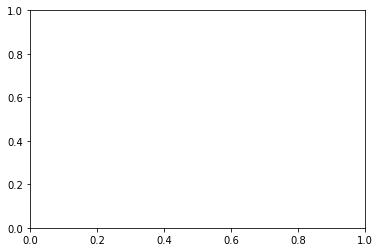

In [29]:
ax = plt.axes()

What is `ax`?

In [30]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

We know that the type of something tells us what we can do with that something.

We can find out that `matplotlib.axes._subplots.AxesSubplot` is a subclass of `matplotlib.axes._axes.Axes`.

In [31]:
type(ax).__bases__

(matplotlib.axes._subplots.SubplotBase, matplotlib.axes._axes.Axes)

And [this documentation](https://matplotlib.org/api/axes_api.html) tells us what we can do with an `Axes` object.

Most importantly, we can plot stuff.

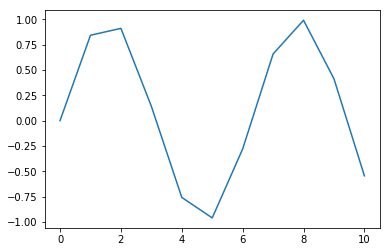

In [32]:
ax = plt.axes()
ax.plot(x, np.sin(x));

Note the trailing semicolon on the last line.  What happens if we omit that?

We can plot multiple things on one set of axes:

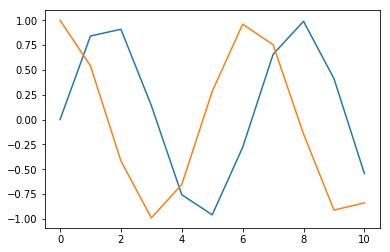

In [33]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

We can change how we call `ax.plot` to set properties of the lines that get drawn:

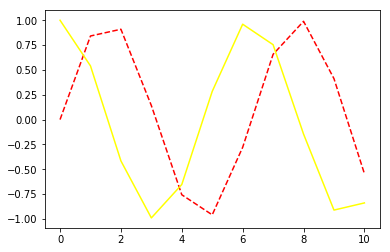

In [34]:
ax = plt.axes()
ax.plot(x, np.sin(x), color='#ff0000', linestyle='--', label='sin(x)')
ax.plot(x, np.cos(x), color='#ffff00', linestyle='-', label='cos(x)');

There are a lot of properties we can set, which are documented [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot).  See also [controlling line properties](https://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

We can also call some other methods on `ax` to set other properties of the chart:

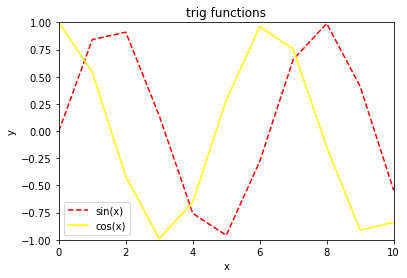

In [35]:
ax = plt.axes()

ax.plot(x, np.sin(x), color='#ff0000', linestyle='--', label='sin(x)')
ax.plot(x, np.cos(x), color='#ffff00', linestyle='-', label='cos(x)')

ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.set_title('trig functions')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

We can also set several properties of `ax` in one go:

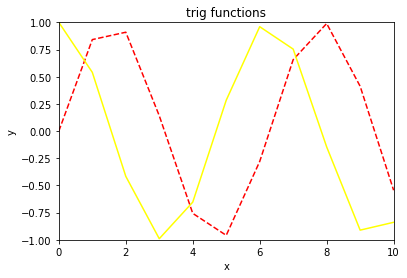

In [36]:
ax = plt.axes()

ax.plot(x, np.sin(x), color='#ff0000', linestyle='--', label='sin(x)')
ax.plot(x, np.cos(x), color='#ffff00', linestyle='-', label='cos(x)')

ax.set(
    xlim=(0, 10),
    ylim=(-1, 1),
    title=('trig functions'),
    xlabel='x',
    ylabel='y',
);

What we have seen so far is matplotlib's object-oriented interface.  We're getting hold of an object (via `plt.axes()`), and calling methods on that object.

An alternative, older, interface, is the MATLAB style.  It's basically equivalent for simple things with a single chart, but gets fiddly with more complex plots.

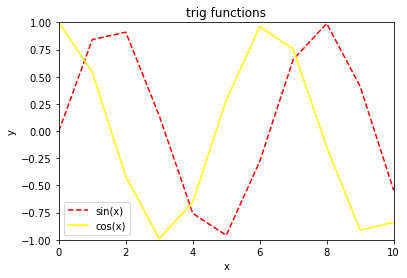

In [37]:
plt.plot(x, np.sin(x), color='#ff0000', linestyle='--', label='sin(x)')
plt.plot(x, np.cos(x), color='#ffff00', linestyle='-', label='cos(x)')
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.title('trig functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

It's not uncommon for some third-party code we use (eg GeoPandas) to plot something for us, but to not give us much control over how it has has done its plotting.

For an example, let's see how to apply some formatting to a couple of lines on a chart plotted with `plt.plot()`:

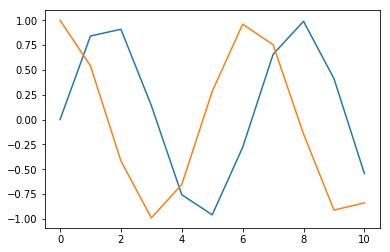

In [38]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

First of all, we can get hold of an `Axes` object using `plt.gca()`:

("gca" stands for "get current axes")

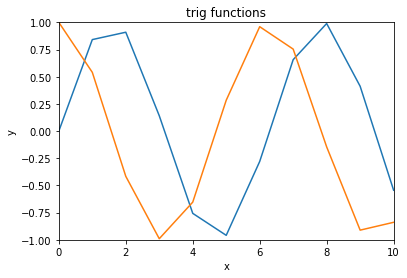

In [39]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

ax = plt.gca()

ax.set(
    xlim=(0, 10),
    ylim=(-1, 1),
    title=('trig functions'),
    xlabel='x',
    ylabel='y',
);

We can also get hold of each individual line belonging to `ax` with `ax.get_lines()`:

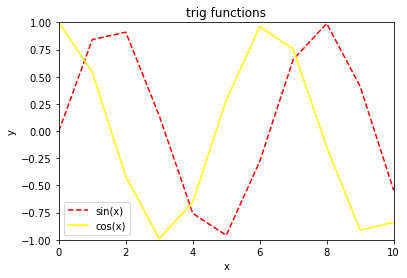

In [40]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

ax = plt.gca()

ax.set(
    xlim=(0, 10),
    ylim=(-1, 1),
    title=('trig functions'),
    xlabel='x',
    ylabel='y',
)

lines = ax.get_lines()

line1, line2 = ax.get_lines()

line1.set(color='#ff0000', linestyle='--', label='sin(x)')
line2.set(color='#ffff00', linestyle='-', label='cos(x)')

ax.legend();

Note that we can't call `ax.legend()` until we've set the labels on the lines.

We can also plot directly from Pandas:

In [41]:
df = pd.DataFrame({'sin': np.sin(x), 'cos': np.cos(x)}, index=x)
df

,cos,sin
0.0,1.000000,0.000000
1.0,0.540302,0.841471
2.0,-0.416147,0.909297
3.0,-0.989992,0.141120
4.0,-0.653644,-0.756802
5.0,0.283662,-0.958924
6.0,0.960170,-0.279415
7.0,0.753902,0.656987
8.0,-0.145500,0.989358
9.0,-0.911130,0.412118


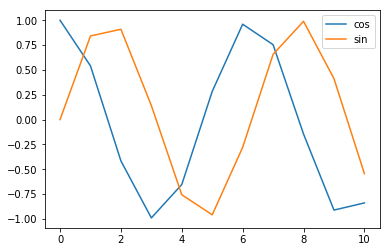

In [42]:
df.plot();

We can use functions in the `plt` module to control what the plot looks like:

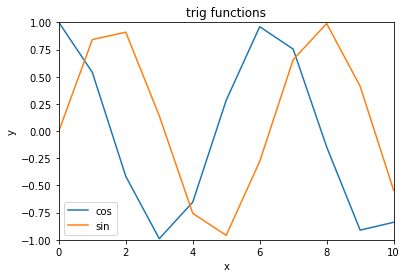

In [43]:
df.plot()
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.title('trig functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Or we can pass arguments to `df.plot()` to control some aspects of appearance:

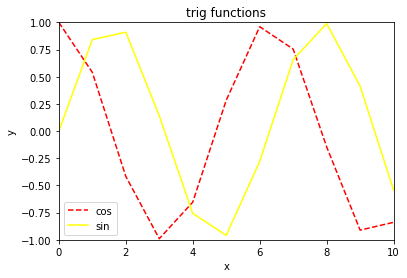

In [44]:
df.plot(
    color=['#ff0000', '#ffff00'],
    style=['--', '-'],
    xlim=(0, 10),
    ylim=(-1, 1),
    title=('trig functions'),
)
plt.xlabel('x')
plt.ylabel('y');

Note we still have to call `plt.xlabel`/`plt.ylabel`.

matplotlib lets us add multiple sets of axes to a figure:

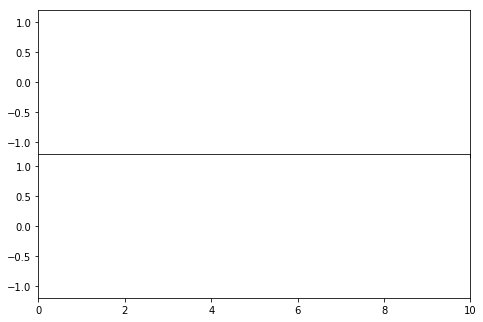

In [45]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0.5, 1, 0.5], xlim=(0, 10), ylim=(-1.2, 1.2), xticklabels=[])
ax2 = fig.add_axes([0, 0, 1, 0.5], xlim=(0, 10), ylim=(-1.2, 1.2))

`add_axes` is documented [here](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes).

With a pair of axes, we can plot different things on each:

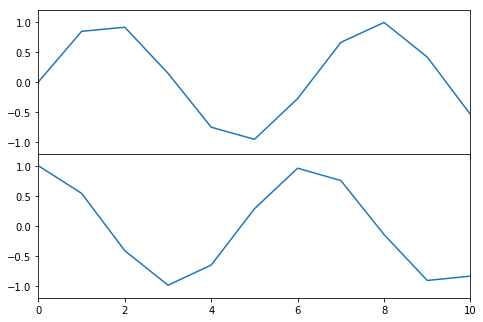

In [46]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0.5, 1, 0.5], xlim=(0, 10), ylim=(-1.2, 1.2), xticklabels=[])
ax2 = fig.add_axes([0, 0, 1, 0.5], xlim=(0, 10), ylim=(-1.2, 1.2))

ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x));

Figuring out the co-ordinates of our subplots might get tedious, so `plt.subplot()` is useful:

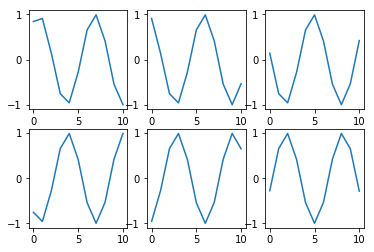

In [47]:
ax = plt.subplot(2, 3, 1)
ax.plot(x, np.sin(x + 1))

ax = plt.subplot(2, 3, 2)
ax.plot(x, np.sin(x + 2))

ax = plt.subplot(2, 3, 3)
ax.plot(x, np.sin(x + 3))

ax = plt.subplot(2, 3, 4)
ax.plot(x, np.sin(x + 4))

ax = plt.subplot(2, 3, 5)
ax.plot(x, np.sin(x + 5))

ax = plt.subplot(2, 3, 6)
ax.plot(x, np.sin(x + 6));

We can achieve the same here with a `for` loop:

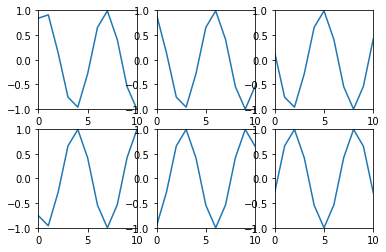

In [48]:
for i in range(1, 7):
    ax = plt.subplot(2, 3, i)
    ax.plot(x, np.sin(x + i))
    ax.set_xlim(0, 10)
    ax.set_ylim(-1, 1)

The object-oriented interface lets us create subplots on a figure:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106faf6a0>,
      dtype=object)

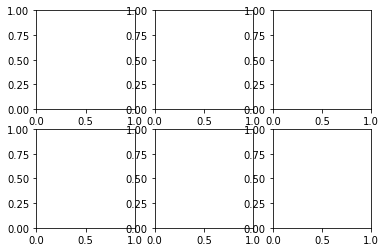

In [49]:
fig = plt.figure()
axes = fig.subplots(2, 3)
axes

In this example, the axes overlap, but we can avoid that easily:

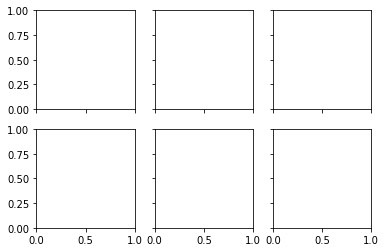

In [50]:
fig = plt.figure()
fig.subplots(2, 3, sharex=True, sharey=True);

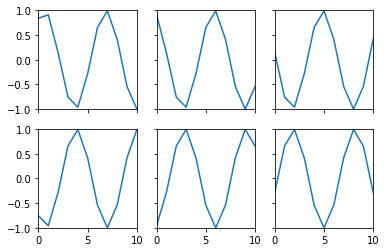

In [51]:
fig = plt.figure()
axes = fig.subplots(2, 3, sharex=True, sharey=True)

for row in range(2):
    for col in range(3):
        ax = axes[row][col]
        i = row * 3 + col + 1
        ax.plot(x, np.sin(x + i))
        ax.set_xlim(0, 10)
        ax.set_ylim(-1, 1)

Let's say we didn't know about `subplots()` and `sharex`/`sharey`:

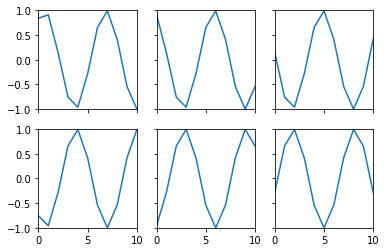

In [52]:
fig = plt.figure()
axes = fig.subplots(2, 3)

for row in range(2):
    for col in range(3):
        ax = axes[row][col]
        i = row * 3 + col + 1
        ax.plot(x, np.sin(x + i))
        ax.set_xlim(0, 10)
        ax.set_ylim(-1, 1)
        
        if row != 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
            
        if col != 0:
            ax.yaxis.set_major_formatter(plt.NullFormatter())

You can read more about formatting axes [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html).

We can also format individual lines:

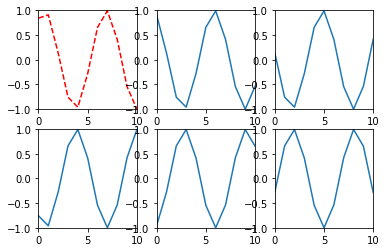

In [53]:
fig = plt.figure()
axes = fig.subplots(2, 3)

for row in range(2):
    for col in range(3):
        ax = axes[row][col]
        i = row * 3 + col + 1
        ax.plot(x, np.sin(x + i))
        ax.set_xlim(0, 10)
        ax.set_ylim(-1, 1)
        
        if row == 0 and col == 0:
            line, = ax.get_lines()
            line.set(color='#ff0000', linestyle='--')

We can always get hold of a set of axes later on:

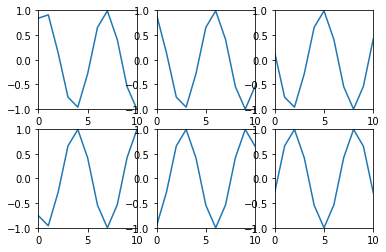

In [54]:
fig = plt.figure()
axes = fig.subplots(2, 3)

for row in range(2):
    for col in range(3):
        ax = axes[row][col]
        i = row * 3 + col + 1
        ax.plot(x, np.sin(x + i))
        ax.set_xlim(0, 10)
        ax.set_ylim(-1, 1)

# imagine we don't have access to fig and axes for some reason
del fig
del axes

fig = plt.gcf()
fig.axes

Note that `fig.axes` is a list of `AxesSubplot` objects, not an array of arrays (which is what `fig.subplots()` returns)

From `fig.axes` we can retrieve a single set of axes to format.

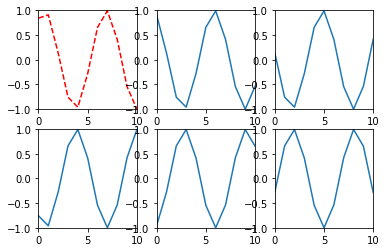

In [55]:
fig = plt.figure()
axes = fig.subplots(2, 3)

for row in range(2):
    for col in range(3):
        ax = axes[row][col]
        i = row * 3 + col + 1
        ax.plot(x, np.sin(x + i))
        ax.set_xlim(0, 10)
        ax.set_ylim(-1, 1)

# imagine we don't have access to fig and axes for some reason
del fig
del axes

fig = plt.gcf()
axes = fig.axes

ax = axes[0]
line, = ax.get_lines()
line.set(color='#ff0000', linestyle='--');